In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Part1

# Get data from cv
article_info = pd.read_csv('./data/articleInfo.csv')
author_info = pd.read_csv('./data/authorInfo.csv')

# merge into one dataframe
df = pd.merge(article_info, author_info, on='Article No.')
df.fillna(0, inplace=True)

# drop duplicates and group by year
df1 = df.drop_duplicates(subset='Article No.', ignore_index=True)
df2 = df1.groupby('Year').count()['Article No.']

<AxesSubplot: xlabel='Year', ylabel='Articles'>

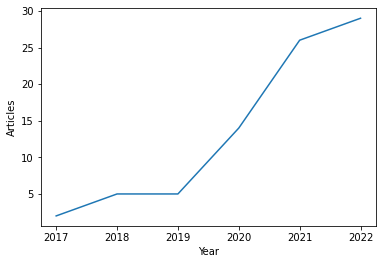

In [5]:
# Problem 1
df2.plot(ylabel='Articles')

C:\Users\kanie\AppData\Local\Temp\ipykernel_17912\505889240.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_citations = df1.groupby('Year').sum()['Citation']


<AxesSubplot: xlabel='Year', ylabel='# of Citations'>

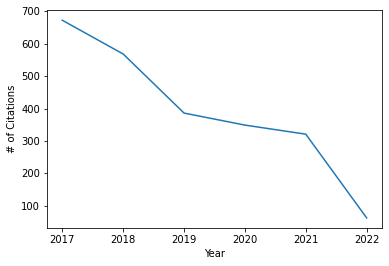

In [6]:
# Problem 2
df_citations = df1.groupby('Year').sum()['Citation']
df_citations.plot(ylabel='# of Citations')

In [7]:
# geopandas df for problem 3
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

# County by Article No.
world = world.rename(columns={"name": "Country"})

# Rename country names to match
df1.loc[df1['Country'] == 'USA', 'Country'] = 'United States of America' 

# Merge datasets
world = pd.merge(world, df1, on='Country', how='outer')

# Fille article N/A with zero
world.loc[world['Article No.'].isnull(), 'Article No.'] = 0

<AxesSubplot: >

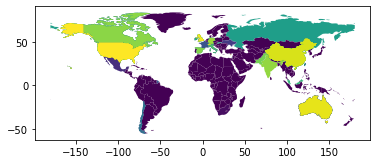

In [8]:
# Problem 3
world.plot(column='Article No.')

In [9]:
# Part 1: Problem 4
df_institute = pd.DataFrame(df.groupby('Author Affiliation').count()['Author Name'].sort_values(ascending=False))
df_institute = df_institute.rename(columns={'Author Name': 'Appearances'})
df_research = df1.sort_values(by='h-index', ascending=False)
df_research = df_research[['Author Name', 'h-index']]


In [10]:
# Problem 4

# Top 5 Institutions based on # publications 
df_institute.head()

,Appearances
Author Affiliation,
University of the Western Cape,17
Masaryk University,12
Intel Corporation,11
University College Cork,11
Madigan Army Medical Center,8


In [19]:
#===================PART II========================#
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
# Part II

# 1. 

#import data
df_tickets = pd.read_csv('./data/data.csv')

#initialize model
lin_reg = LinearRegression(fit_intercept=True)

# drop empty column
df_tickets = df_tickets.dropna(how='all', axis=1)

# Set independent and dependent axis
y = df_tickets[['SUS']]
X = df_tickets[['ASR_Error', 'Intent_Error', 'Duration', 'Gender', 'Purchase']]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()


# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)


# train model (analysis)
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)






### 1. Statistical Results are shown below

In [23]:
# Linear Regression Metrics
R2 = metrics.r2_score(y_test, y_pred)

print(model.summary())
print(R2)




                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        20:34:14   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           93.0282      5.541     16.788   

### Question 2 

ASR and Intent Error are both statistically signifigant to determining the SUS score compared to the other independent variables

### Question 3

ASR and Intent Error I suspected to be signifigant however I thought that purchase would have a signifigance over the SUS score however it had no signifigance

### Question 4

The most influential factor for SUS is the Intent Error which can de denoted by it's p-value above

### Question 5

The errors are would be big factors considering the SUS score because the dependendent variable is usability. Intent and ASR error effects usability of the software way more than the other independent variables.

In [13]:
#=============== PART III ========================#

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
# Part III Classification

# Data preprocessing

# Import data
df_tickets = pd.read_csv('./data/data.csv')

# Drop the unessarry columns
df_tickets = df_tickets.dropna(how='all', axis=1)
df_tickets.drop(['SUS'], axis=1, inplace=True)

# Train test split for model
y = df_tickets['Purchase'].copy()
X = df_tickets.drop(['Purchase'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=101)

# Define models
log_reg = LogisticRegression()
support_vm = svm.SVC(kernel='linear')
nb = GaussianNB()
randf = RandomForestClassifier()


# Train models
log_reg.fit(X_train, y_train)
support_vm.fit(X_train, y_train)
nb.fit(X_train, y_train)
randf.fit(X_train, y_train)







RandomForestClassifier()

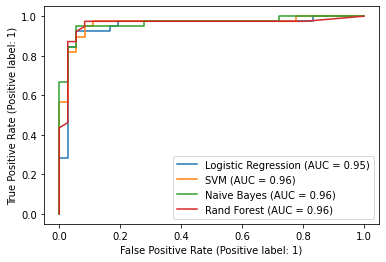

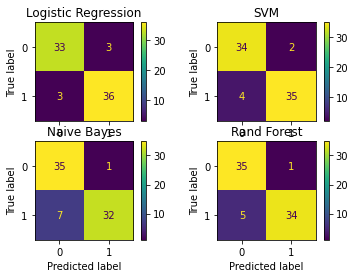

In [14]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

def get_metrics(x_test, y_test, classifier, name): 
    #train model

    y_pred = classifier.predict(x_test)
    y_test = y_test.reset_index(drop=True)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)

    return accuracy, precision, recall

log_acc, log_prec, log_rec = get_metrics(x_test=X_test, y_test=y_test, classifier=log_reg, name='Logistic Regression')
svm_acc, svm_prec, svm_rec = get_metrics(x_test=X_test, y_test=y_test, classifier=support_vm, name='Support Vector Machine')
nb_acc, nb_prec, nb_rec = get_metrics(x_test=X_test, y_test=y_test, classifier=nb, name='Naive Bayes')
randf_acc, randf_prec, randf_rec = get_metrics(x_test=X_test, y_test=y_test, classifier=randf, name='Random Forest')


# Visualize ROC Curves
fig, ax = plt.subplots()

RocCurveDisplay.from_estimator(log_reg, X_test, y_test, ax=ax, name="Logistic Regression")
RocCurveDisplay.from_estimator(support_vm, X_test, y_test, ax=ax, name="SVM")
RocCurveDisplay.from_estimator(nb, X_test, y_test, ax=ax, name="Naive Bayes")
RocCurveDisplay.from_estimator(randf, X_test, y_test, ax=ax, name="Rand Forest")

# Visualize 
fig2, ([ax1, ax2], [ax3,ax4]) = plt.subplots(2,2)
ax1.set_title('Logistic Regression')
ax2.set_title('SVM')
ax3.set_title('Naive Bayes')
ax4.set_title('Rand Forest')


ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, ax=ax1)
ConfusionMatrixDisplay.from_estimator(support_vm, X_test, y_test, ax=ax2)
ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test, ax=ax3)
ConfusionMatrixDisplay.from_estimator(randf, X_test, y_test, ax=ax4)


